In [267]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [170]:
from sklearn.datasets import load_iris
data=load_iris()
X=data.data
y=data.target

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score,f1_score, precision_score

In [174]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=5)


In [204]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [221]:
Knn.fit(X_train, y_train)
y_pred=Knn.predict(X_test)
acc=accuracy_score(y_test, y_pred)

Knn.predict_proba(X_test)
print(acc)



0.9473684210526315


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [226]:
ytest=pd.Series(y_test)
ypred=pd.Series(y_pred)
ytest
ypred


0     1
1     2
2     2
3     0
4     2
5     1
6     0
7     2
8     0
9     1
10    1
11    2
12    2
13    2
14    0
15    0
16    2
17    2
18    0
19    0
20    1
21    2
22    0
23    2
24    1
25    2
26    1
27    1
28    1
29    2
30    0
31    1
32    1
33    0
34    1
35    0
36    0
37    2
dtype: int32

In [227]:
ytest.value_counts()

1    14
2    12
0    12
dtype: int64

In [236]:
ypred.value_counts()

2    14
1    12
0    12
dtype: int64

In [237]:
ypred[(ypred!=ytest)]
1-2/38

0.9473684210526316

In [240]:
ypred.mean()

1.0526315789473684

In [242]:
1-ypred.mean()

-0.05263157894736836

In [244]:
from sklearn.metrics import confusion_matrix

2

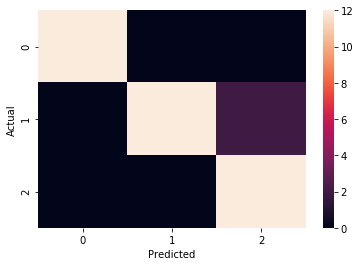

In [257]:
confusion_matrix(y_test, y_pred,labels=(0, 1,2))
sb.heatmap(confusion_matrix(y_test, y_pred))
plt.ylabel("Actual")
plt.xlabel("Predicted")
conmat=confusion_matrix(y_test, y_pred,labels=(0, 1,2))
TP=conmat[1,2]
TP

In [263]:
recall_score(ytest, ypred, average='micro')

0.9473684210526315

In [266]:
precision_score(ytest, ypred,average='macro')

0.9523809523809524

In [206]:
CV=cross_validate(Knn, X, y)

In [207]:
from sklearn.cross_validation import cross_val_score, KFold


In [208]:
scores=cross_val_score(Knn, X, y, cv=10, scoring="accuracy")
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [209]:
scores.mean()

0.9666666666666668

In [213]:
ytest=pd.Series(y_test)

In [216]:
ytest.value_counts()

1    14
2    12
0    12
dtype: int64

In [217]:
ytest.mean()

1.0

In [219]:
1-ytest.mean()

0.0

In [84]:
krange=list(range(1,30))
kscores=[]
for numbers in krange:
    Knn=KNeighborsClassifier(n_neighbors=numbers)
    scores=cross_val_score(Knn, X, y, cv=10,scoring="accuracy")
    kscores.append(scores.mean())
    

In [85]:
kscores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334]

In [86]:
max(kscores)

0.9800000000000001

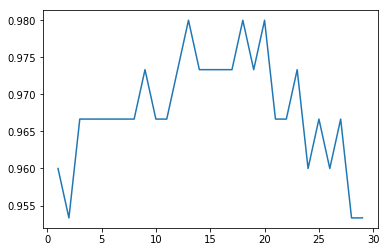

In [88]:
plt.plot(krange, kscores)

#### doing this more efficiently

In [93]:
from sklearn.model_selection import GridSearchCV
param=dict(n_neighbors=krange)

In [95]:
grid=GridSearchCV(Knn,param_grid=param,scoring="accuracy", cv=10  )

In [100]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [102]:
grid.classes_

array([0, 1, 2])

In [104]:
grid.best_score_

0.98

In [106]:
grid.best_params_

{'n_neighbors': 13}

In [108]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

#### Searching multiple parameters simultaneously

In [123]:
params=dict(n_neighbors=krange, weights=["unfiorm", "distance"])
params

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'weights': ['unfiorm', 'distance']}

In [133]:
grid=GridSearchCV(Knn, params, cv=10, scoring="accuracy")
grid


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['unfiorm', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
grid.fit(X,y)

ValueError: weights not recognized: should be 'uniform', 'distance', or a callable function

#### Evaluatng model`

In [145]:
from sklearn.datasets import load_boston

In [155]:
df=load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [163]:
X=df.data
y=df.target
import numpy as np

In [268]:
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=5)
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train, y_train)
y_pred=Knn.predict(X_test)
acc=accuracy_score(y_test, y_pred)

Knn.predict_proba(X_test)
print(acc)


0.9473684210526315


### Label Encoding

In [272]:
X = pd.read_csv('F:\Dataset\Telecom dataset.csv')
X.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,2,13,44,1,9,64.00,4,5,0,0,...,0,0,0,0,0,1,0,0,1,1
1,3,11,33,1,7,136.00,5,5,0,0,...,1,1,0,1,1,1,1,0,4,1
2,3,68,52,1,24,116.00,1,29,0,1,...,0,0,0,1,1,0,1,0,3,0


In [274]:
X.dtypes

region        int64
tenure        int64
age           int64
marital       int64
address       int64
income       object
ed            int64
employ        int64
retire        int64
gender        int64
reside        int64
tollfree      int64
equip         int64
callcard      int64
wireless      int64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten      object
tollten      object
equipten     object
cardten      object
wireten      object
multline      int64
voice         int64
pager         int64
internet      int64
callid        int64
callwait      int64
forward       int64
confer        int64
ebill         int64
custcat       int64
churn         int64
dtype: object

In [277]:
from sklearn.preprocessing import LabelEncoder

In [279]:
le=LabelEncoder()

In [281]:
le.fit(X.longmon)

LabelEncoder()

In [286]:
lelongmon=le.transform(X.longmon)

In [285]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()

In [287]:
enc.fit_transform(lelongmon)

ValueError: Expected 2D array, got 1D array instead:
array=[ 41.  55. 286. 154.  93. 192. 179.  88. 160. 335.  64. 109. 136. 256.
  55.  69. 263. 100.   1. 101.  42. 311.  73. 250. 203.  13. 130. 147.
  25.  78. 175. 312.  97.  63. 387.  52. 315. 161.  98. 401.  18.  52.
  91.  80. 244. 240. 210. 122.  26.  32.  93. 340. 123.  64.  92. 111.
 120. 255. 172. 302. 207. 365. 170. 367. 253. 146. 144. 418.  87.  30.
 136.  99. 123. 112. 339.  30. 175. 185. 372. 124. 143.   6. 193.  77.
 243. 112.  64. 274.  35. 116. 109. 217. 200.  84.  42. 169.  81. 189.
 138. 298.  28. 334.  47. 101. 119.  67. 157.  99.  84. 345. 205. 164.
  10. 196. 275.  63.  43. 213. 228.  36. 246. 199.  52.  83.  75. 168.
  74. 157. 154. 351. 329.  71. 202. 298. 146.  52. 151.  52. 230.  43.
 137. 323.  64. 380.   8. 307. 197. 128. 225. 170. 273. 320. 209. 127.
 144.  34.  18.  46. 212. 108. 211. 242. 292.  97. 277. 408. 199.  61.
  17. 314.  91.  54. 234.  60. 336.  56. 249. 152. 181.  25. 234.  30.
 109. 247. 277.  52.  60. 239. 249. 117. 175.  68. 125. 394.  94. 116.
 150. 316.  23. 423. 121.  56. 107. 207. 206.  59. 424. 117. 413. 215.
  49.  12. 172.  41. 235. 352. 105. 106. 417. 122.  52.  21. 104. 204.
   3. 254. 147.  57.  89. 388. 182. 127. 379.  43. 218. 121. 195. 230.
  72. 294. 126. 392. 292. 119. 116. 227. 278. 119.  70. 141.  45. 151.
 182. 122.  24. 317.  48. 179. 264.  50. 234.  88. 225. 383. 177. 150.
  14. 203. 153.  68. 102. 359. 362. 198.  53. 404. 135. 366. 211. 133.
 184.  82. 104. 330. 101. 138. 199.  61. 158. 255.  44. 310. 177. 100.
  82. 188.  87. 263.  90. 161. 319.  96. 132. 208.  21.  58.  70.  43.
 107. 305.  30. 153.  46. 118.  38. 123. 139.   1.  54.  45.  37. 156.
  53.  77.  48. 421.  27. 237. 123. 232. 145. 296. 157.  65. 293.  52.
 113.  75. 100. 200. 112. 360. 107. 410. 245.  50.  92.  37. 202. 270.
 331. 422.  88.   5. 136. 353. 223.  95. 402.  59.  27.  55. 181. 180.
 271. 117. 177. 260. 290. 293. 343. 219. 285.  38.  56. 122. 103. 247.
 122. 117.  48.  75. 371. 117. 358. 279. 221. 337.  75. 335. 112. 416.
 342. 202. 211.  68. 288. 203. 265. 301. 127. 120. 206. 343. 228. 373.
  72. 180.  97. 129. 217.  20.  53. 396. 377. 303.  14. 162.  60.   0.
  39.  39. 127.  26.  51. 326. 195. 154.  68. 321.  86. 355.  62. 197.
  62. 109. 219. 126. 210.  65. 158.  43.  48. 115. 107. 333. 261. 169.
 121. 257. 144. 208.  31. 201. 292.  30.  59.  60. 240.  84. 109. 112.
 136. 125. 135. 403.  72.  87. 409. 152. 129.  16.  95.  31. 304. 126.
 327. 115.   3. 289.  55.  83.  81.  40.  80.  60. 130. 145. 389. 155.
  72. 140.  23.  66. 210. 170. 198. 338.  32.  75.  36. 137.  91. 126.
  35. 265. 255.  36. 131. 101.  88.  93. 369.  52.  21.  53.  33.  70.
  77. 206. 271. 299. 350. 150.  62. 108. 319.  35. 214. 200.  50.  51.
 297. 220. 176.  96. 384. 348. 110. 291. 177. 212. 131. 141. 220. 128.
 181. 286. 162.  17. 172.  95. 232.  99.  51. 242. 146. 136. 274.  80.
 172. 281. 125.   2. 231.  40.  30.  91. 134.  11. 104. 306. 325.  75.
  94.  59.  11. 128. 236. 104. 294. 208. 374.  35.  66. 194.  76.  85.
 101. 111. 242.  31. 229. 295. 125. 156. 118. 113.  11.  39. 107.  68.
  38.  86. 114. 291. 191. 230.  23.  57.  89. 407. 226. 324. 385.  91.
  26.  42. 270. 375. 245.  35.  49. 112. 268. 157. 105. 300. 328.  88.
 284. 209.  48. 130. 120.  53. 149.  61. 382. 262.  87.  46. 259.  66.
  50. 110. 267.  50.  83. 130.  62. 166. 251. 120.  31. 230. 142.  91.
  33.  41. 146. 144.  31.  55. 116. 113.  27.  57.  84. 238. 395. 265.
 294. 199. 163. 253.  64.  64.  75.  86. 168. 357. 169. 283. 386.  47.
 265.  68. 210. 313. 279. 412. 180. 202. 196. 411.  70. 370. 114. 117.
 125. 173. 338. 106.   9. 271.  74. 233. 169. 236. 178. 180. 178. 363.
  32.  95. 356. 236. 219.  72.  33.  16.   5.  93.  98.  83. 190.  39.
  96.   7.  64.  89.  33. 364. 178. 389. 247.  44. 125. 135. 102. 308.
 415. 249. 186. 211. 248. 221. 347.  51. 262. 419. 196. 146. 406. 173.
 287. 175. 271. 176. 153.  40.  78. 129. 291.  95. 214. 112.  66. 236.
  80.  14.  52. 230.  37. 414. 112. 165.  61. 130. 138.  18. 219. 168.
 346.  78. 187. 224. 368. 148.  64. 183. 206. 150.  15. 163. 400. 159.
 372. 341.  75. 159.  55. 289.  78. 399. 165.  89. 284. 207. 318. 180.
  86. 314. 119. 157.  42. 393.  29. 272.  41.  77. 282.  96. 238. 169.
 106. 202.  50. 109.  72. 222. 349. 102.  89.  85. 390. 253. 137.  71.
  79. 239. 112.  72. 269.  40.   6.  90.  39. 241. 263.  10. 357.  99.
 248.  95. 195. 109. 253.  68. 111. 133. 178. 251. 361.   9.  68.  96.
 135. 309.  44. 397. 176. 388.  87. 391. 205.  56.  76.  79. 134. 228.
 119.  67. 123. 182.  49.  88. 171. 145. 198. 206. 213.  34. 236.  60.
  86. 109.  22.  62.  29. 113. 172. 173.  46.  79. 109. 262.  61.  44.
 323. 106. 149.  30. 275. 282. 233. 247. 378. 210.   4. 115. 420. 344.
 120. 156. 139. 258.  63.  52. 108. 405.  23. 322.  86.  58.  97. 276.
  42. 124.  64. 164. 266. 174. 332.  53. 169. 171. 382. 104.  69. 118.
 195.  66.  44. 376.  67.   8. 167. 280.  39. 243. 200. 154.  75. 311.
  62.  83.  30. 207. 169.  29. 197. 381. 262. 251. 141. 307. 252. 276.
  71.  51.  87.  65.  44. 139.  19.  40. 398. 117. 249. 271.  66.  71.
  41.  27.  60. 354. 347. 216.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.